## Chapter 2.1 Forward Gravity: Simple example

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

#%matplotlib widget


In [2]:
geo_model = gp.load_model('Greenstone', path= '../../data/gempy_models')

Active grids: ['regular']


In [3]:
geo_model.series

order_series BottomRelation
EarlyGranite_Series             1        Erosion
BIF_Series                      2        Erosion
SimpleMafic_Series              3        Erosion
Basement                        4        Erosion

In [4]:
geo_model.surfaces

surface               series  order_surfaces  isBasement    color vertices edges  id  value_0
3  EarlyGranite  EarlyGranite_Series               1       False  #728f02      NaN   NaN   1     2.61
0  SimpleMafic2           BIF_Series               1       False  #015482      NaN   NaN   2     2.92
1     SimpleBIF           BIF_Series               2       False  #9f0052      NaN   NaN   3     3.10
2  SimpleMafic1   SimpleMafic_Series               1       False  #ffbe00      NaN   NaN   4     2.92
4      basement             Basement               1        True  #443988      NaN   NaN   5     2.61

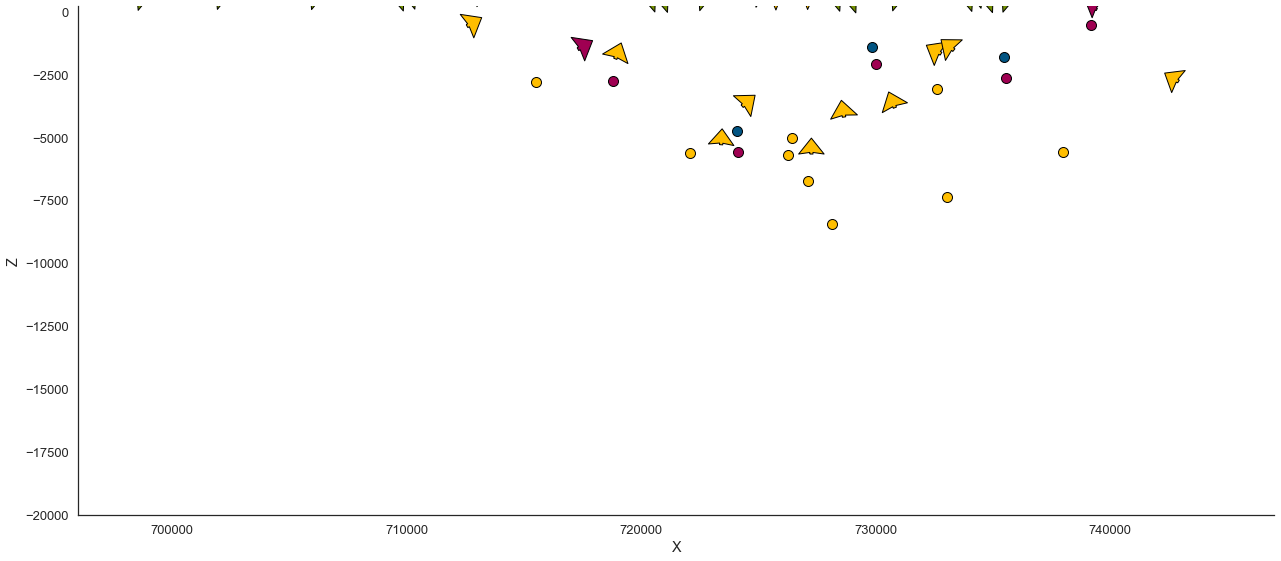

In [5]:
gp.plot.plot_data(geo_model)

In [6]:
# Compute normal model:
# gp.set_interpolation_data(geo_model,
#                           compile_theano=True,
#                           theano_optimizer='fast_compile',
#                           verbose=[])
# gp.compute_model(geo_model)

### Creating grid

First we need to define the location of the devices. For this example we can make a map:

In [7]:
grav_res = 20
X = np.linspace(7.050000e+05, 747000, grav_res)
Y = np.linspace(6863000, 6925000, grav_res)
Z= 300
xyz= np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T
xy_ravel

array([[7.05000000e+05, 6.86300000e+06, 3.00000000e+02],
       [7.07210526e+05, 6.86300000e+06, 3.00000000e+02],
       [7.09421053e+05, 6.86300000e+06, 3.00000000e+02],
       ...,
       [7.42578947e+05, 6.92500000e+06, 3.00000000e+02],
       [7.44789474e+05, 6.92500000e+06, 3.00000000e+02],
       [7.47000000e+05, 6.92500000e+06, 3.00000000e+02]])

We can see the location of the devices relative to the model data:

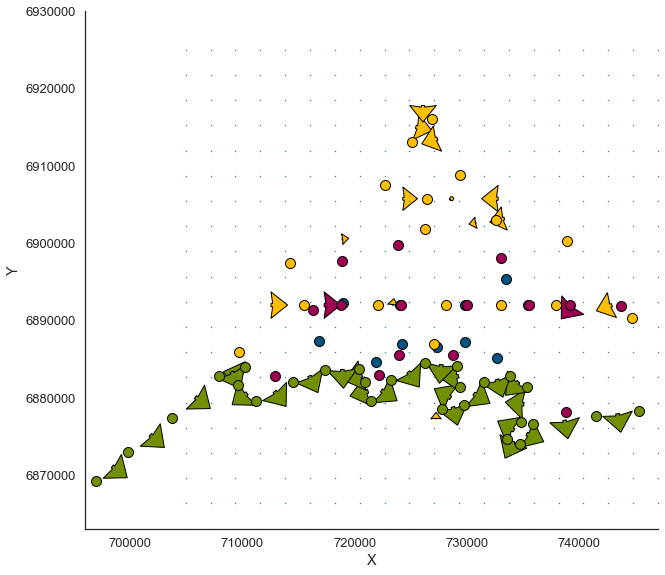

In [8]:
import matplotlib.pyplot as plt
gp.plot.plot_data(geo_model, direction='z')
plt.scatter(xy_ravel[:,0], xy_ravel[:, 1], s=1)

Now we need to create the grid centered on the devices (see: https://github.com/cgre-aachen/gempy/blob/master/notebooks/tutorials/ch1-3-Grids.ipynb)

In [9]:
geo_model.set_centered_grid(xy_ravel,  resolution = [10, 10, 15], radio=5000)

Active grids: ['regular' 'centered']


Grid Object. Values: 
array([[ 6.96510000e+05,  6.86367000e+06, -1.97980000e+04],
       [ 6.96510000e+05,  6.86367000e+06, -1.93940000e+04],
       [ 6.96510000e+05,  6.86367000e+06, -1.89900000e+04],
       ...,
       [ 7.52000000e+05,  6.93000000e+06, -3.10768481e+03],
       [ 7.52000000e+05,  6.93000000e+06, -4.31811404e+03],
       [ 7.52000000e+05,  6.93000000e+06, -6.00000000e+03]])

In [10]:
geo_model.grid.centered_grid.kernel_centers

array([[-5000.        , -5000.        ,  -300.        ],
       [-5000.        , -5000.        ,  -360.        ],
       [-5000.        , -5000.        ,  -383.36972966],
       ...,
       [ 5000.        ,  5000.        , -3407.68480754],
       [ 5000.        ,  5000.        , -4618.11403801],
       [ 5000.        ,  5000.        , -6300.        ]])

Now we need to compute the component tz (see https://github.com/cgre-achen/gempy/blob/master/notebooks/tutorials/ch2-2-Cell_selection.ipynb)

In [11]:
from gempy.assets.geophysics import GeophysicsPreprocessing

In [12]:
g = GeophysicsPreprocessing(geo_model.grid.centered_grid)

In [13]:
tz = g.set_tz_kernel()

### Compiling the gravity graph

If geo_model has already a centered grid, the calculation of tz happens automatically. Alternatively you pass tz to `set_gravity interpolator`. This theano graph will return gravity instead the lithologies. In addition we need either to pass the density block (see below). Or the position of density on the surface(in the future the name) to compute the density block at running time.

In [14]:
geo_model.surfaces

surface               series  order_surfaces  isBasement    color vertices edges  id  value_0
3  EarlyGranite  EarlyGranite_Series               1       False  #728f02      NaN   NaN   1     2.61
0  SimpleMafic2           BIF_Series               1       False  #015482      NaN   NaN   2     2.92
1     SimpleBIF           BIF_Series               2       False  #9f0052      NaN   NaN   3     3.10
2  SimpleMafic1   SimpleMafic_Series               1       False  #ffbe00      NaN   NaN   4     2.92
4      basement             Basement               1        True  #443988      NaN   NaN   5     2.61

In this case the densities of each layer are at the loc 1 (0 is the id)

In [15]:
geo_model.set_gravity_interpolator(pos_density=1, verbose=['grid_shape', 'slices'])

Compiling theano function...
Compilation Done!


values
dtype                          float32
output                         geology
theano_optimizer          fast_compile
device                             cpu
verbosity         [grid_shape, slices]

Once we have created a gravity interpolator we can call it from compute model as follows:

In [16]:
grav = gp.compute_model(geo_model, output='gravity')

Active grids: ['centered']
grid_shape __str__ = [774532]
slices __str__ = [     0  46728  93456 140184 186912 233640 280368 327096 373824 420552
 467280 514008 560736 607464 654192 700920 747648 774532]
grid_shape __str__ = [774532]
slices __str__ = [     0 151515 303030 454545 606060 757575 774532]
grid_shape __str__ = [774532]
slices __str__ = [     0  86206 172412 258618 344824 431030 517236 603442 689648 774532]
density __str__ = [2.6099999 2.6099999 2.6099999 ... 2.6099999 2.6099999 2.6099999]
n_devices __str__ = 400


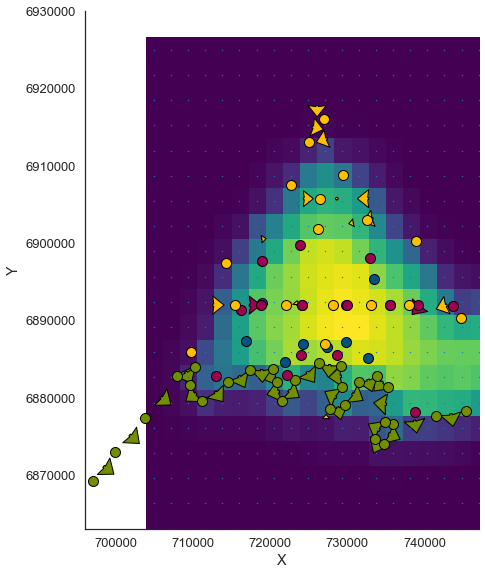

In [17]:
gp.plot.plot_data(geo_model, direction='z', height=7)
plt.scatter(xy_ravel[:,0], xy_ravel[:, 1], s=1)
plt.imshow(grav.reshape(grav_res, grav_res), extent = (xy_ravel[:,0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0])/2,
                                                       xy_ravel[:,0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0])/2,
                                                       xy_ravel[:,1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1])/2,
                                                       xy_ravel[:,1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1])/2),
           cmap='viridis_r', origin='bottom')

In [18]:
grav

array([-4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39368881e-06,
       -4.39368881e-06, -4.39368881e-06, -4.39368881e-06, -4.39537369e-06,
       -4.39368881e-06, -

#### Plotting lithologies

If we want to compute the lithologies we will need to create a normal interpolator object as seen in the Chapter 1 of the tutorials  

In [19]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_run',
                          verbose=[])

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


Now we want to interpolate on a regular grid for a simple plot. Therefore we need to activate the regular grid:

In [20]:
geo_model.set_active_grid('regular')

Active grids: ['regular']


Grid Object. Values: 
array([[ 6.96510e+05,  6.86367e+06, -1.97980e+04],
       [ 6.96510e+05,  6.86367e+06, -1.93940e+04],
       [ 6.96510e+05,  6.86367e+06, -1.89900e+04],
       ...,
       [ 7.46490e+05,  6.92933e+06, -8.10000e+02],
       [ 7.46490e+05,  6.92933e+06, -4.06000e+02],
       [ 7.46490e+05,  6.92933e+06, -2.00000e+00]])

In [21]:
gp.compute_model(geo_model)


Lithology ids 
  [5. 5. 5. ... 5. 5. 5.] 

Now we can plot all together (change the alpha parameter to see the gravity overlying):

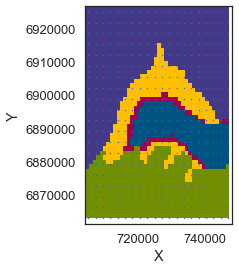

In [22]:
gp.plot.plot_section(geo_model, -1, direction='z')
plt.scatter(xy_ravel[:,0], xy_ravel[:, 1], s=1)
plt.imshow(grav.reshape(grav_res, grav_res), extent = (xy_ravel[:,0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0])/2,
                                                       xy_ravel[:,0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0])/2,
                                                       xy_ravel[:,1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1])/2,
                                                       xy_ravel[:,1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1])/2),
           cmap='viridis_r', origin='bottom', alpha=.0)

### Computing gravity by passing the density block.

We may have computed the densities on a previous step and we want to compute gravity afterwards. First lets compute the density block on a centered grid:

In [23]:
geo_model.set_active_grid('centered')

Active grids: ['centered']


Grid Object. Values: 
array([[ 7.00000000e+05,  6.85800000e+06,  0.00000000e+00],
       [ 7.00000000e+05,  6.85800000e+06, -6.00000000e+01],
       [ 7.00000000e+05,  6.85800000e+06, -8.33697297e+01],
       ...,
       [ 7.52000000e+05,  6.93000000e+06, -3.10768481e+03],
       [ 7.52000000e+05,  6.93000000e+06, -4.31811404e+03],
       [ 7.52000000e+05,  6.93000000e+06, -6.00000000e+03]])

In [24]:
geo_model.grid.length

array([     0,      0,      0,      0,      0, 774400])

In [25]:
sol = gp.compute_model(geo_model, set_solutions=False)

In [26]:
l0, l1 = geo_model.grid.get_grid_args('centered')
sol[0][1][l0:l1]

array([2.6099999, 2.6099999, 2.6099999, ..., 2.6099999, 2.6099999,
       2.6099999])

Notice that since the heavy computations have been already carried on the compilation of the graph and the evaluation of the gravity is rather fast!

In [27]:
geo_model.set_gravity_interpolator(density_block=sol[0][1][l0:l1])

Compiling theano function...
Compilation Done!


values
dtype              float32
output             geology
theano_optimizer  fast_run
device                 cpu
verbosity               []

In [28]:
grav_shared = gp.compute_model(geo_model, output='gravity')

Active grids: ['centered']
density __str__ = [2.6099999 2.6099999 2.6099999 ... 2.6099999 2.6099999 2.6099999]
n_devices __str__ = 400


In [29]:
# We check that the results are the same as we got before:
(grav != grav_shared).sum()

0